In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

temp = pd.read_csv('https://github.com/alanjones2/dataviz/raw/master/londonweather.csv')
temp

,Year,Month,Tmax,Tmin,Rain,Sun
0,1957,1,8.7,2.7,39.5,53.0
1,1957,2,9.0,2.9,69.8,64.9
2,1957,3,13.9,5.7,25.4,96.7
3,1957,4,14.2,5.2,5.7,169.6
4,1957,5,16.2,6.5,21.3,195.0
...,...,...,...,...,...,...
743,2018,12,10.7,5.2,60.6,40.3
744,2019,1,7.6,2.0,33.2,56.4
745,2019,2,12.4,3.3,34.2,120.2
746,2019,3,13.1,5.8,49.6,119.0


In [5]:
con = sqlite3.connect("DBTemperaturasLondres.db")
temp.to_sql("temperatura", con, if_exists="replace", index=False)

748

In [6]:
query_2019 = "SELECT * FROM temperatura WHERE year = 2019"
df_2019 = pd.read_sql_query(query_2019, con)
print("\nTemperaturas do ano de 2019:")
print(df_2019.head())


Temperaturas do ano de 2019:
   Year  Month  Tmax  Tmin  Rain    Sun
0  2019      1   7.6   2.0  33.2   56.4
1  2019      2  12.4   3.3  34.2  120.2
2  2019      3  13.1   5.8  49.6  119.0
3  2019      4  15.8   5.7  12.8  170.1


In [7]:
df_2019.to_sql("temp2019", con, if_exists="replace", index=False)

4

In [8]:
query_min = "SELECT * FROM temperatura WHERE TMIN <= 10"
df_tmin = pd.read_sql_query(query_min, con)

In [10]:
df_tmin

,Year,Month,Tmax,Tmin,Rain,Sun
0,1957,1,8.7,2.7,39.5,53.0
1,1957,2,9.0,2.9,69.8,64.9
2,1957,3,13.9,5.7,25.4,96.7
3,1957,4,14.2,5.2,5.7,169.6
4,1957,5,16.2,6.5,21.3,195.0
...,...,...,...,...,...,...
493,2018,12,10.7,5.2,60.6,40.3
494,2019,1,7.6,2.0,33.2,56.4
495,2019,2,12.4,3.3,34.2,120.2
496,2019,3,13.1,5.8,49.6,119.0


In [12]:
temp_por_mes = df_tmin.groupby("Month")["Tmin"].count()
print("\nQuantidade de temperaturas TMIN <= 10°C por mês:")
print(temp_por_mes)


Quantidade de temperaturas TMIN <= 10°C por mês:
Month
1     63
2     63
3     63
4     63
5     57
6      5
9      7
10    53
11    62
12    62
Name: Tmin, dtype: int64


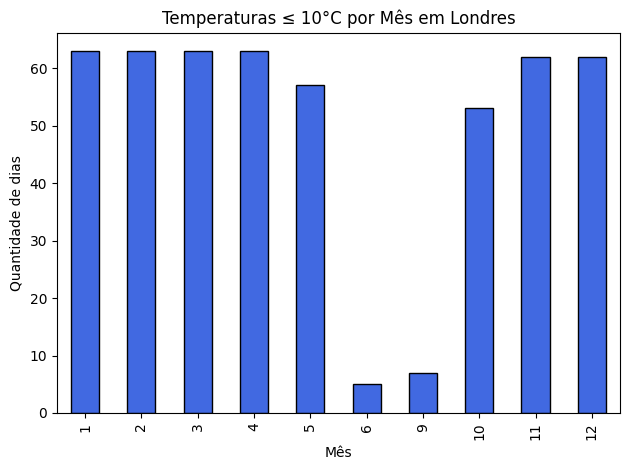

In [13]:
temp_por_mes.plot(
    kind="bar",
    title="Temperaturas ≤ 10°C por Mês em Londres",
    xlabel="Mês",
    ylabel="Quantidade de dias",
    color="royalblue",
    edgecolor="black"
)
plt.tight_layout()
plt.show()

In [14]:
meses_frios = temp_por_mes[temp_por_mes == temp_por_mes.max()]
print("\nMeses mais frios (maior número de dias com TMIN ≤ 10°C):")
print(meses_frios)

con.close()


Meses mais frios (maior número de dias com TMIN ≤ 10°C):
Month
1    63
2    63
3    63
4    63
Name: Tmin, dtype: int64
